# Data Collection

In [ ]:
!pip install kagglehub

In [3]:
import kagglehub

path = kagglehub.dataset_download("carrie1/ecommerce-data")
print("Path to dataset files:", path)

100%|██████████| 7.20M/7.20M [00:00<00:00, 56.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1


In [4]:
import pandas as pd
df = pd.read_csv('/root/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1/data.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Cleaning and Preprocessing

In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [9]:
df.duplicated().sum()

np.int64(5225)

In [10]:
df = df.drop_duplicates()
df.shape

(401604, 8)

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

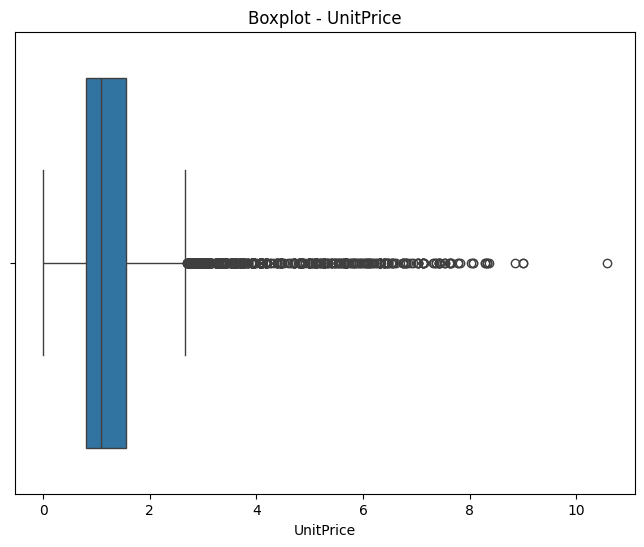

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))
sns.boxplot(x=np.log1p(df['UnitPrice']))
plt.title("Boxplot - UnitPrice")
plt.show()

In [13]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[df['UnitPrice'] > 0]
df = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


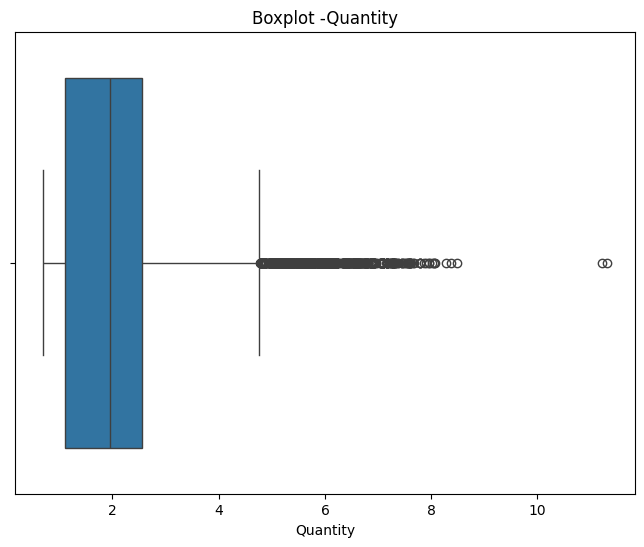

In [14]:

plt.figure(figsize=(8,6))
sns.boxplot(x=np.log1p(df['Quantity']))
plt.title("Boxplot -Quantity")
plt.show()

In [15]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[df['Quantity'] > 0]
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [16]:
df.shape

(333234, 8)

In [17]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


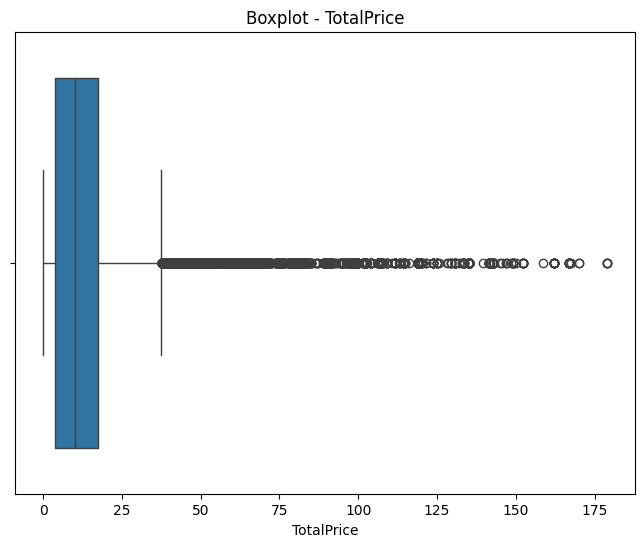

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['TotalPrice'])
plt.title("Boxplot - TotalPrice")
plt.show()


In [20]:
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[df['TotalPrice'] > 0]
df = df[(df['TotalPrice'] >= lower_bound) & (df['TotalPrice'] <= upper_bound)]

In [21]:
df.shape

(319806, 9)

# Exploratory Data Analysis (EDA)

In [22]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,319806.000000,319806,319806.000000,319806.000000,319806.000000
mean,7.141748,2011-07-12 15:46:29.448415232,2.125062,15331.785501,10.961622
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.001000
25%,2.000000,2011-04-08 09:45:00,0.950000,14002.000000,3.750000
50%,5.000000,2011-08-03 12:10:00,1.650000,15256.000000,9.900000
75%,12.000000,2011-10-23 12:46:00,2.950000,16837.000000,16.500000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000,37.500000
std,6.493338,NaN,1.500825,1709.821705,8.232676


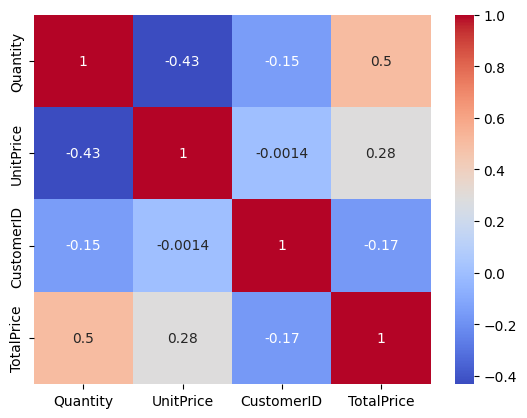

In [23]:
import numpy as np
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

1- Trends of Buying Products Over Months

/tmp/ipython-input-272689636.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', palette='viridis')


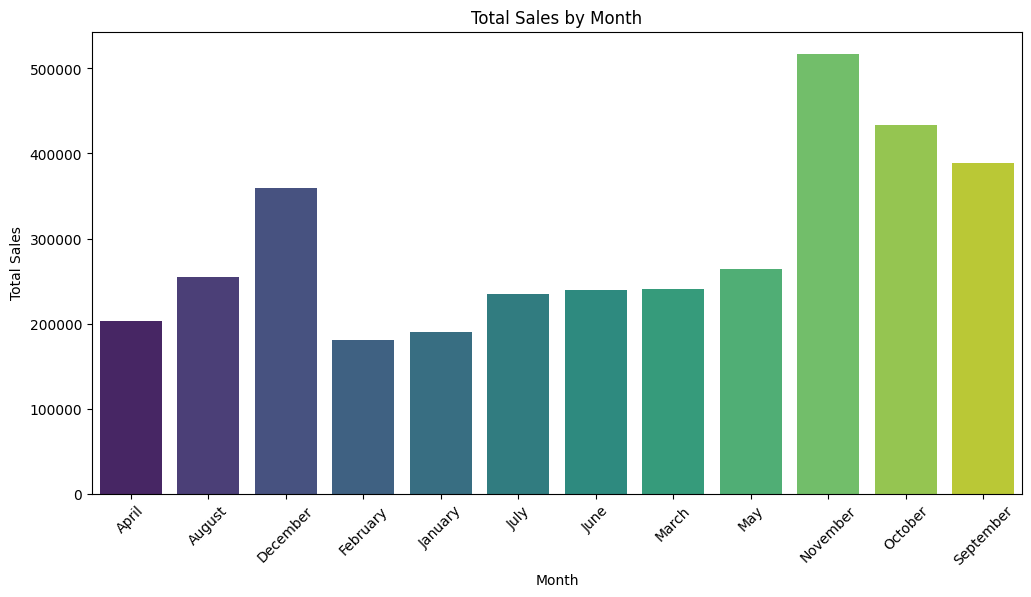

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month_name()

monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

2- Analyze Visualize top 10 countries by total sales

/tmp/ipython-input-2709748906.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


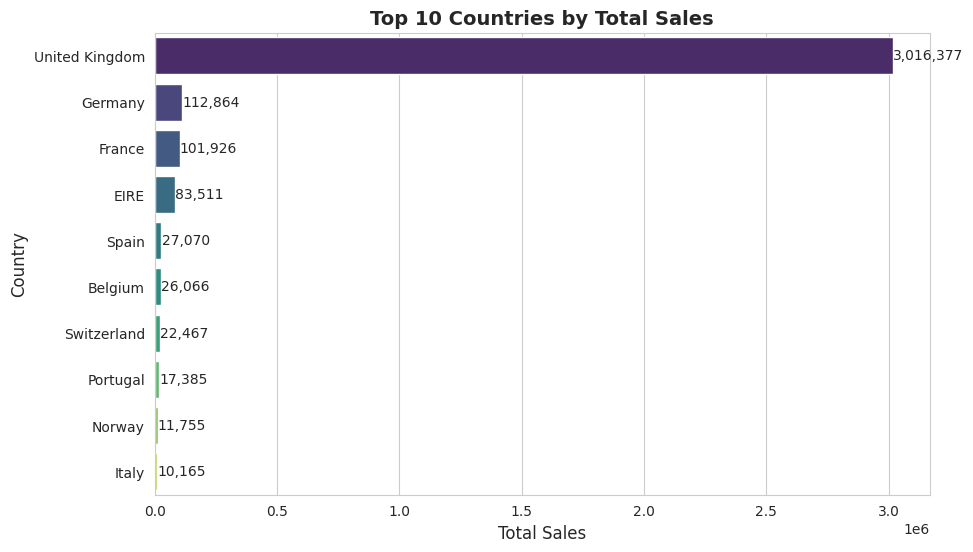

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='viridis'
    )

plt.title('Top 10 Countries by Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Country', fontsize=12)

for i, value in enumerate(top_countries.values):
    plt.text(value + 1000, i, f'{int(value):,}', va='center', fontsize=10)

plt.show()

 3- Analyze and visualize top 10 customers by total spending

/tmp/ipython-input-1117106433.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


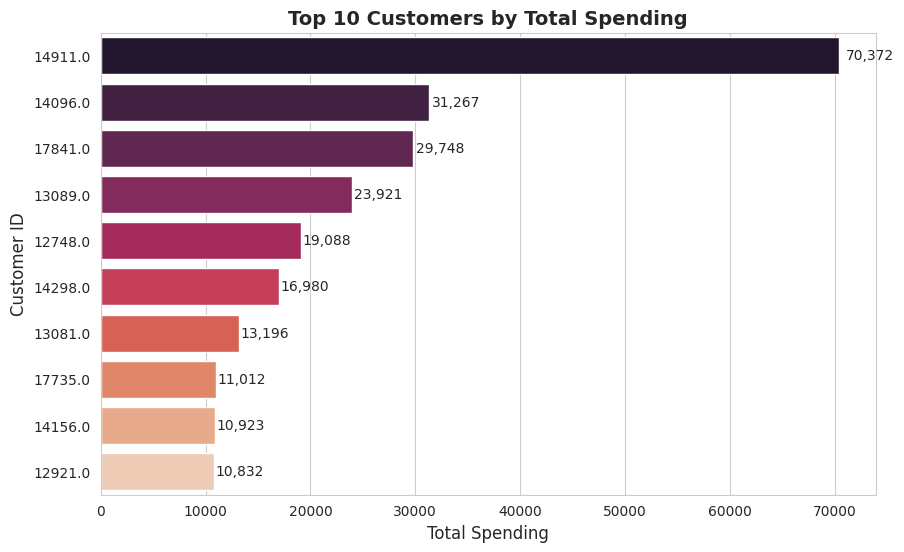

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    x=top_customers.values,
    y=top_customers.index.astype(str),
    palette='rocket'
)

plt.title('Top 10 Customers by Total Spending', fontsize=14, fontweight='bold')
plt.xlabel('Total Spending', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)

for i, value in enumerate(top_customers.values):
    plt.text(value + (value * 0.01), i, f'{int(value):,}', va='center', fontsize=10)
plt.show()

4- Analyze and visualize top 10 most sold products


/tmp/ipython-input-1924421655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='mako')


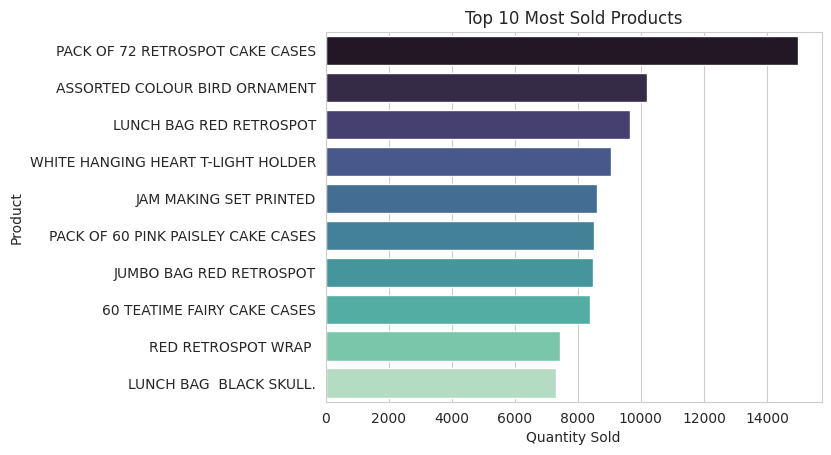

In [27]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

# **Advanced Analysis**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop(columns=['TotalPrice'])
y = df['TotalPrice']

text_features = ['StockCode', 'Description', 'Country']
numeric_features = ['Quantity', 'UnitPrice', 'CustomerID']

label_encoders = {}
for col in text_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

X_encoded = X[text_features + numeric_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.5697


In [30]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Month'],
      dtype='object')

In [31]:
df.to_csv('Cleaned_Ecommerce_Data.csv', index=False)

# Automate  and schedule the Process



In [ ]:
import pandas as pd
import numpy as np
import schedule
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def automate_pipeline():
    # read the data
    df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')

    df = df.dropna(subset=['CustomerID', 'Description'])
    df = df.drop_duplicates()
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # UnitPrice outliers
    Q1, Q3 = df['UnitPrice'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] <= Q3 + 1.5 * IQR)]

    # Quantity outliers
    Q1, Q3 = df['Quantity'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df['Quantity'] > 0) & (df['Quantity'] <= Q3 + 1.5 * IQR)]

    # creat new column TotalPrice
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

    # TotalPrice outliers
    Q1, Q3 = df['TotalPrice'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df['TotalPrice'] > 0) & (df['TotalPrice'] <= Q3 + 1.5 * IQR)]

    print("🧹 Data cleaned successfully!")

    # EDA
    monthly_sales = df.groupby(df['InvoiceDate'].dt.month_name())['TotalPrice'].sum()
    print("📊 Top months by sales:")
    print(monthly_sales.sort_values(ascending=False).head(3))

    # train a linear regression model
    X = df.drop(columns=['TotalPrice'])
    y = df['TotalPrice']

    text_features = ['StockCode', 'Description', 'Country']
    numeric_features = ['Quantity', 'UnitPrice', 'CustomerID']

    label_encoders = {}
    for col in text_features:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

    X_encoded = X[text_features + numeric_features]
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.4f}")

    df.to_csv('Cleaned_Ecommerce_Data.csv', index=False)
    print("Cleaned data saved successfully!\n")

schedule.every().day.at("08:00").do(automate_pipeline)

print("Scheduler started")

while True:
    schedule.run_pending()
    time.sleep(60)